# Using rf_functions module to compute rf buckets properties

In [1]:
# Adding folder on TOP of blond_common to PYTHONPATH
import sys
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
sys.path.append('./../../../')

## 0. Defining base ring and rf parameters

In [2]:
# Defining a ramp with a program time vs. energy (warning: initial energy cannot be 0)

from blond_common_fork.interfaces.beam.beam import Particle
from blond_common_fork.interfaces.input_parameters.ring import Ring
from scipy.constants import u,c,e

ring_length = 2*np.pi*100                   # Machine circumference [m]
bending_radius = 70.079                     # Bending radius [m]
bending_field = 1.136487                    # Bending field [T]
gamma_transition = 6.1                      # Transition gamma
alpha_0 = 1/gamma_transition**2.

particle_charge = 39                            # Particle charge [e]
particle_mass = 128.883*u*c**2./e               # Particle mass [eV/c2]
particle = Particle(particle_mass, particle_charge)

ring = Ring(ring_length, alpha_0, bending_field,
            particle, synchronous_data_type='bending field',
            bending_radius=bending_radius)


In [3]:
from blond_common_fork.interfaces.input_parameters.rf_parameters import RFStation

harmonic = [21, 28, 169]
#voltage = [80e3, 0, 0]  # V, h21 Single RF
voltage = [6e3, 20e3, 0]  # V, h21->h28 batch compression
voltage = [0, 16.1e3, 12.4e3]  # V, h28->h169 rebucketting
phi_rf = [np.pi, np.pi, np.pi]  # rad

rf_station = RFStation(ring, harmonic, voltage, phi_rf, n_rf=3)


C:\Work\git\blond_common_fork\interfaces\input_parameters\rf_parameters.py:434: RuntimeWarning: invalid value encountered in true_divide
  acceleration_ratio = denergy/(Particle.charge*RFStation.voltage[0, :])
C:\Work\git\blond_common_fork\interfaces\input_parameters\rf_parameters.py:435: RuntimeWarning: invalid value encountered in greater
  acceleration_test = np.where((acceleration_ratio > -1) *
C:\Work\git\blond_common_fork\interfaces\input_parameters\rf_parameters.py:436: RuntimeWarning: invalid value encountered in less
  (acceleration_ratio < 1) is False)[0]
C:\Work\git\blond_common_fork\interfaces\input_parameters\rf_parameters.py:453: RuntimeWarning: invalid value encountered in remainder
  phi_s[index] = (np.pi - phi_s[index]) % (2*np.pi)


## 1. Computing the RF voltage and RF potential

In [4]:
from blond_common_fork.rf_functions.potential import rf_voltage_generation

n_points = 10000
t_rev = ring.t_rev[0]
voltage = rf_station.voltage[:,0]
harmonic = rf_station.harmonic[:,0]
phi_rf = rf_station.phi_rf[:,0]
time_bounds = [-ring.t_rev[0]/harmonic[0]*2, ring.t_rev[0]/harmonic[0]*2]

time_array, rf_voltage_array = rf_voltage_generation(
    n_points, t_rev, voltage, harmonic, phi_rf, time_bounds=time_bounds)


<IPython.core.display.Javascript object>


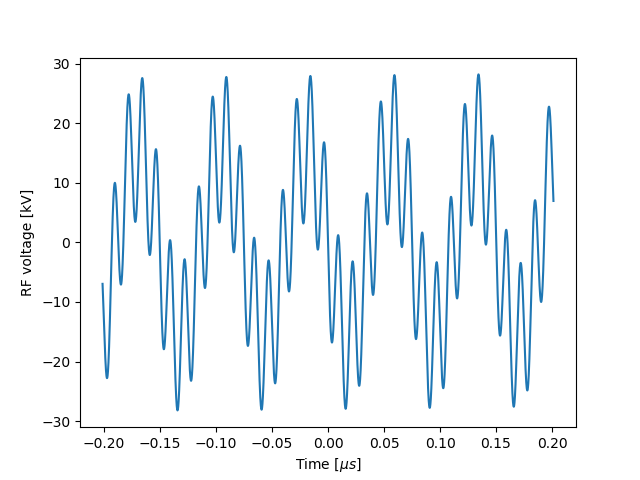

Text(0, 0.5, 'RF voltage [kV]')

In [5]:
plt.figure('RF voltage')
plt.clf()
plt.plot(time_array*1e6, rf_voltage_array/1e3)
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF voltage [kV]')

In [6]:
from blond_common_fork.rf_functions.potential import rf_potential_generation

n_points = 10000
eta_0 = ring.eta_0[0,0]
charge = ring.Particle.charge
energy_increment = ring.delta_E[0]

time_array, rf_potential_array = rf_potential_generation(
    n_points, t_rev, voltage, harmonic, phi_rf, eta_0, charge, energy_increment,
    time_bounds=time_bounds)

<IPython.core.display.Javascript object>


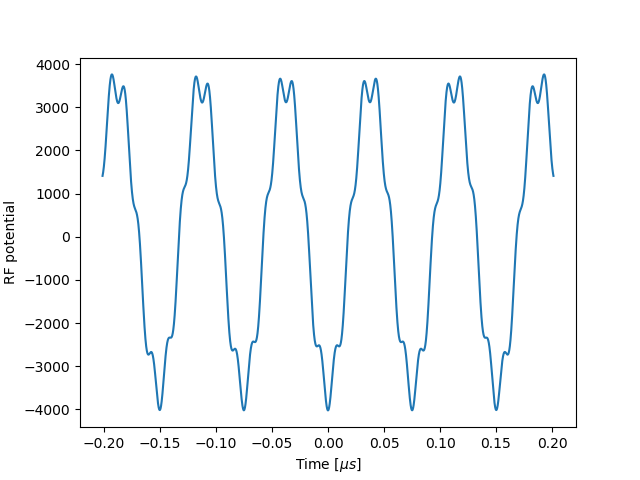

Text(0, 0.5, 'RF potential')

In [7]:
plt.figure('Potential well')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array)
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')

In [8]:
from blond_common_fork.rf_functions.potential import rf_potential_generation

n_points = 10000
eta_0 = ring.eta_0[0,0]
charge = ring.Particle.charge
energy_increment_bis = charge*5e3

time_array, rf_potential_array_acc = rf_potential_generation(
    n_points, t_rev, voltage, harmonic, phi_rf, eta_0, charge, energy_increment_bis,
    time_bounds=time_bounds)

<IPython.core.display.Javascript object>


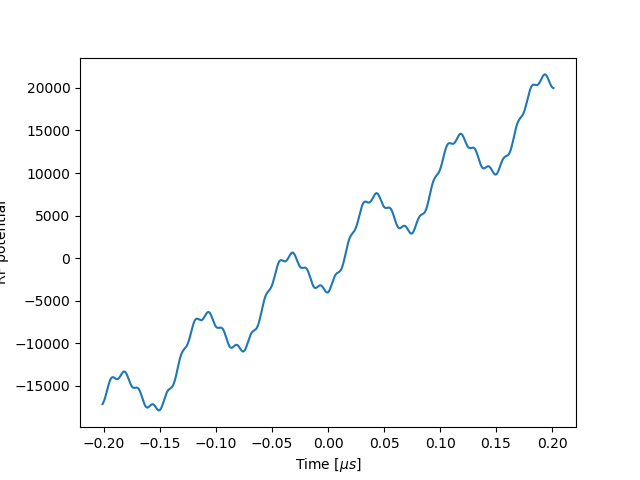

Text(0, 0.5, 'RF potential')

In [9]:
plt.figure('Potential well acc')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array_acc)
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')

In [10]:
from blond_common_fork.rf_functions.potential import rf_potential_generation_cubic

time_array, rf_potential_array_cubic = rf_potential_generation_cubic(
    time_array, rf_voltage_array, eta_0, charge, t_rev, energy_increment)[0:2]


<IPython.core.display.Javascript object>


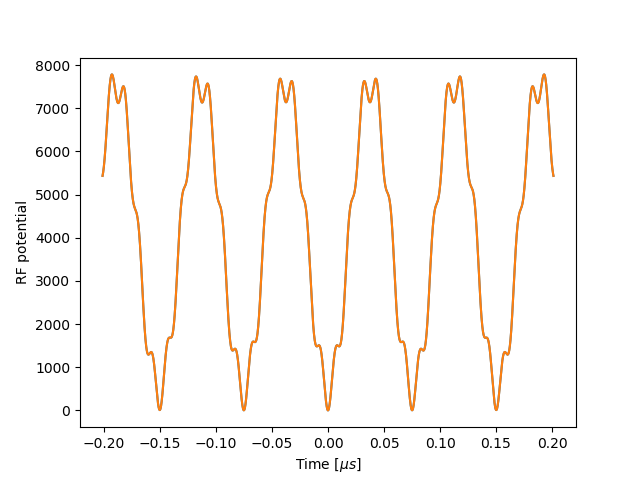

Text(0, 0.5, 'RF potential')

In [11]:
plt.figure('Potential well -2')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array-np.min(rf_potential_array))
plt.plot(time_array*1e6, rf_potential_array_cubic-np.min(rf_potential_array_cubic))
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')

In [12]:
from blond_common_fork.rf_functions.potential import rf_potential_generation_cubic

time_array, rf_potential_array_cubic_acc = rf_potential_generation_cubic(
    time_array, rf_voltage_array, eta_0, charge, t_rev, energy_increment_bis)[0:2]


<IPython.core.display.Javascript object>


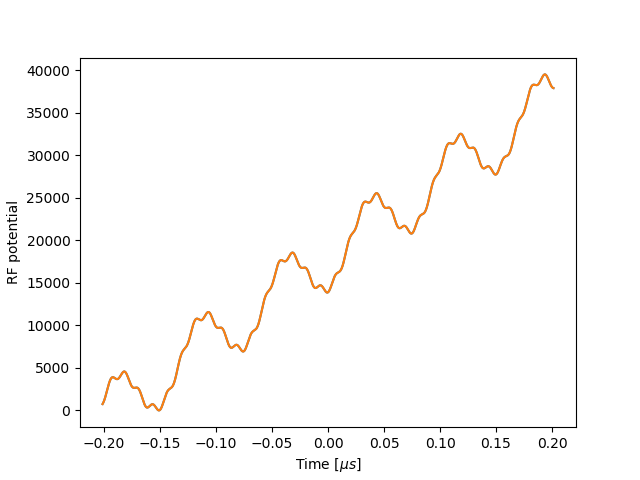

Text(0, 0.5, 'RF potential')

In [13]:
plt.figure('Potential well acc -2')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array_acc-np.min(rf_potential_array_acc))
plt.plot(time_array*1e6, rf_potential_array_cubic_acc-np.min(rf_potential_array_cubic_acc))
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')

## 2. Find potential wells

In [14]:
from blond_common_fork.rf_functions.potential import find_potential_wells_cubic

(potential_well_locs, potential_well_vals,
 potential_well_inner_max, potential_well_min,
 potential_well_min_val) = find_potential_wells_cubic(
    time_array, rf_potential_array, mest=200, verbose=False)

<IPython.core.display.Javascript object>


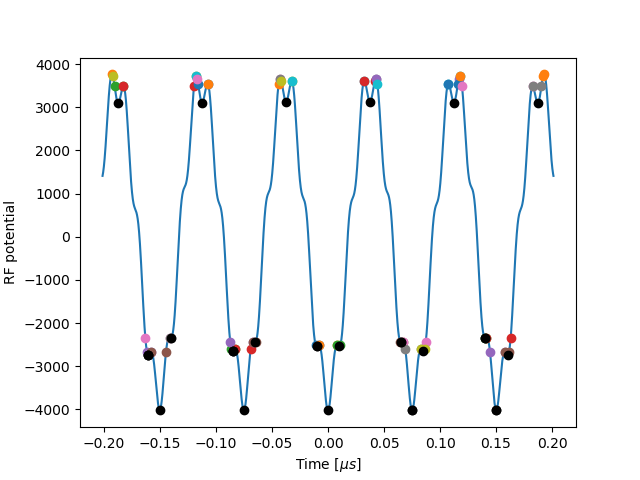

Text(0, 0.5, 'RF potential')

In [15]:
plt.figure('Potential well -3')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array)
for index_pot in range(len(potential_well_locs)):
    plt.plot(np.array(potential_well_locs)[index_pot]*1e6,
             np.array(potential_well_vals)[index_pot], 'o')
plt.plot(np.array(potential_well_min)*1e6, potential_well_min_val, 'ko')
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')

In [16]:
from blond_common_fork.rf_functions.potential import find_potential_wells_cubic

(potential_well_locs, potential_well_vals,
 potential_well_inner_max, potential_well_min,
 potential_well_min_val) = find_potential_wells_cubic(
    time_array, rf_potential_array_acc, mest=200, verbose=False)

<IPython.core.display.Javascript object>


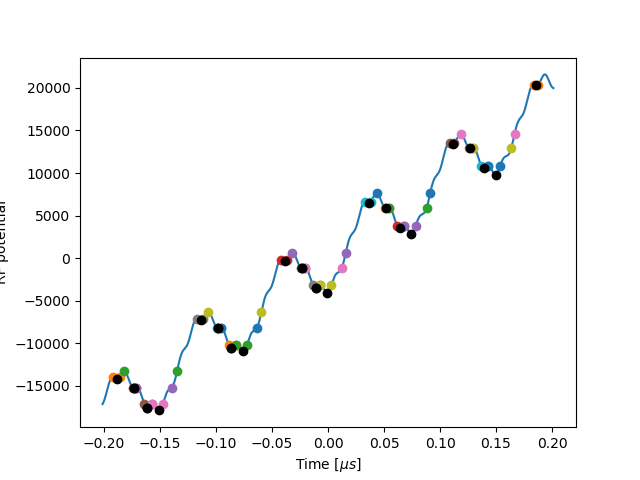

Text(0, 0.5, 'RF potential')

In [17]:
plt.figure('Potential well -4')
plt.clf()
plt.plot(time_array*1e6, rf_potential_array_acc)
for index_pot in range(len(potential_well_locs)):
    plt.plot(np.array(potential_well_locs)[index_pot]*1e6,
             np.array(potential_well_vals)[index_pot], 'o')
plt.plot(np.array(potential_well_min)*1e6, potential_well_min_val, 'ko')
plt.xlabel('Time [$\\mu s$]')
plt.ylabel('RF potential')